    전이학습

In [1]:
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]='TRUE'

In [2]:
BATCH_SIZE=5

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,          # 주어진 이미지의 크기를 설정합니다.
                                  horizontal_flip=True,     # 수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.1,    # 전체 크기의 15% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1,   # 마찬가지로 위, 아래로 이동합니다.
                                  #rotation_range=5,        # 정해진 각도만큼 회전시킵니다.
                                  #shear_range=0.7,         # 좌표 하나를 고정시키고 나머지를 이동시킵니다.
                                  #zoom_range=1.2,          # 확대 또는 축소시킵니다.
                                  #vertical_flip=True,      # 수직 대칭 이미지를 만듭니다.
                                  #fill_mode='nearest'      # 빈 공간을 채우는 방법입니다. nearest 옵션은 가장 비슷한 색으로 채우게 됩니다.
                                  )      

train_generator = train_datagen.flow_from_directory(
       '../data/data/train',   # 학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=BATCH_SIZE,
       class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)  

test_generator = test_datagen.flow_from_directory(
       '../data/data/test',   # 테스트셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=BATCH_SIZE,
       class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [7]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),input_shape=(150, 150, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_1 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_2 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                  

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0002),
             metrics=['accuracy'])

In [11]:
early_stopping=EarlyStopping(monitor='val_loss',patience=5)

In [13]:
history= model.fit(
    train_generator, epochs=100,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

Epoch 1/100
32/32 [==============================] - 3s 68ms/step - loss: 0.7007 - accuracy: 0.4688 - val_loss: 0.6889 - val_accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 2s 59ms/step - loss: 0.6928 - accuracy: 0.5688 - val_loss: 0.6824 - val_accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 2s 57ms/step - loss: 0.6795 - accuracy: 0.6062 - val_loss: 0.6837 - val_accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 2s 60ms/step - loss: 0.6772 - accuracy: 0.5688 - val_loss: 0.6667 - val_accuracy: 0.5083
Epoch 5/100
32/32 [==============================] - 2s 57ms/step - loss: 0.6681 - accuracy: 0.5562 - val_loss: 0.6451 - val_accuracy: 0.5417
Epoch 6/100
32/32 [==============================] - 2s 58ms/step - loss: 0.6535 - accuracy: 0.6125 - val_loss: 0.6546 - val_accuracy: 0.5167
Epoch 7/100
32/32 [==============================] - 2s 59ms/step - loss: 0.6596 - accuracy: 0.6438 - val_loss: 0.6349 - val_accuracy: 0.5583
Epoch 

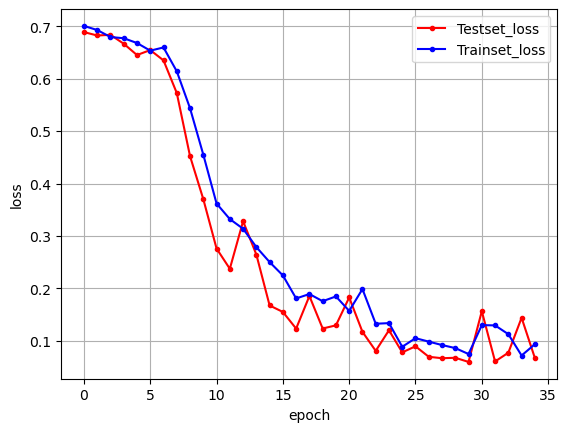

In [14]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

2. 이미 학습된 모델을 가져와서(fine tuning
